In [1]:
#------------------Laden und Überprüfen der Daten
import pandas as pd

# Laden der Excel-Datei
file_path = '/Users/userlow/Documents/kreditkarte_aufgabe/data/PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)

# Anzeigen der ersten Zeilen des Datensatzes
data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [2]:
# Entfernen der 'Unnamed: 0'-Spalte
data = data.drop(columns=['Unnamed: 0'])

# Anzeigen der ersten Zeilen nach dem Entfernen der Spalte
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [3]:
# Überprüfen auf fehlende Werte
missing_values = data.isnull().sum()
print("Fehlende Werte pro Spalte:\n", missing_values)

# Grundlegende Statistiken des Datensatzes
data.describe()

Fehlende Werte pro Spalte:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


,tmsp,amount,success,3D_secured
count,50410,50410.000000,50410.000000,50410.000000
mean,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,NaN,96.274730,0.402160,0.426027


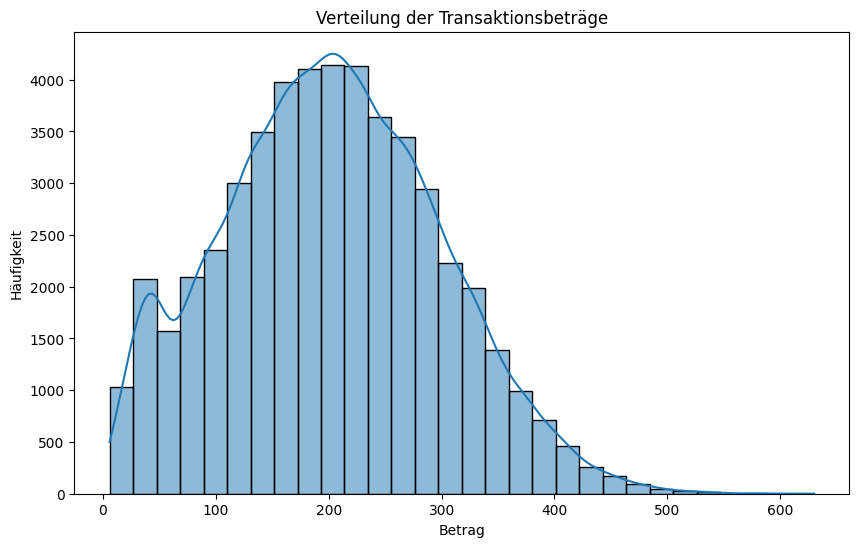

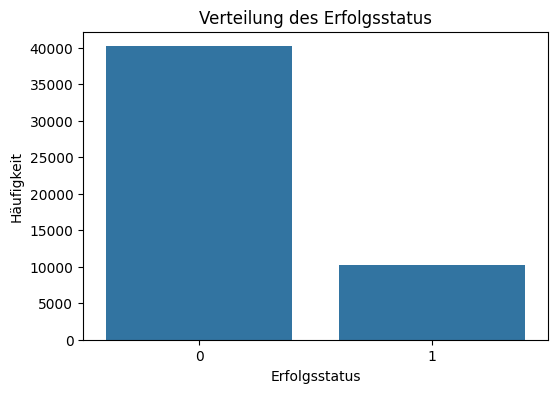

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Transaktionsbeträge
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Verteilung der Transaktionsbeträge')
plt.xlabel('Betrag')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung des Erfolgsstatus
plt.figure(figsize=(6, 4))
sns.countplot(x='success', data=data)
plt.title('Verteilung des Erfolgsstatus')
plt.xlabel('Erfolgsstatus')
plt.ylabel('Häufigkeit')
plt.show()

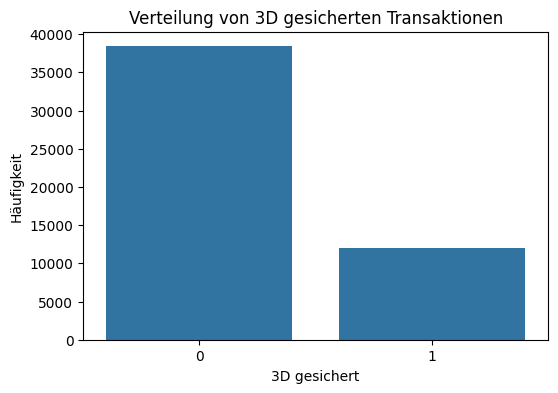

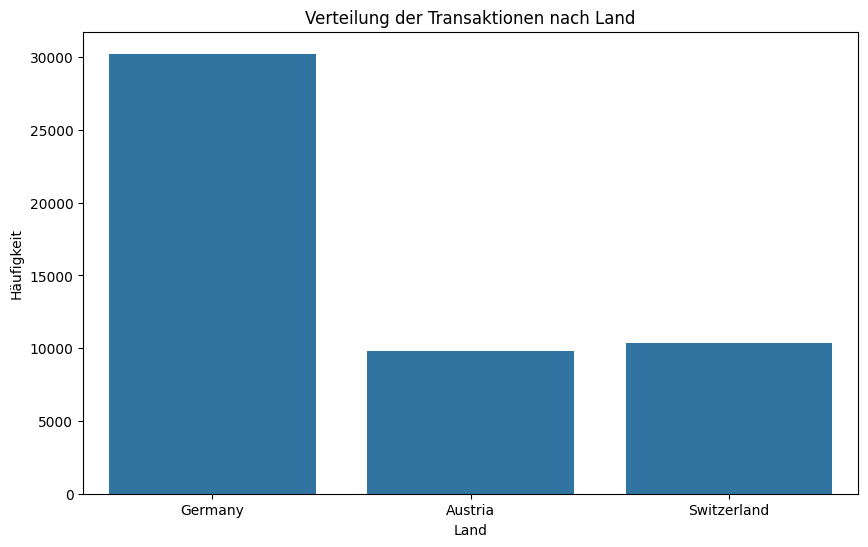

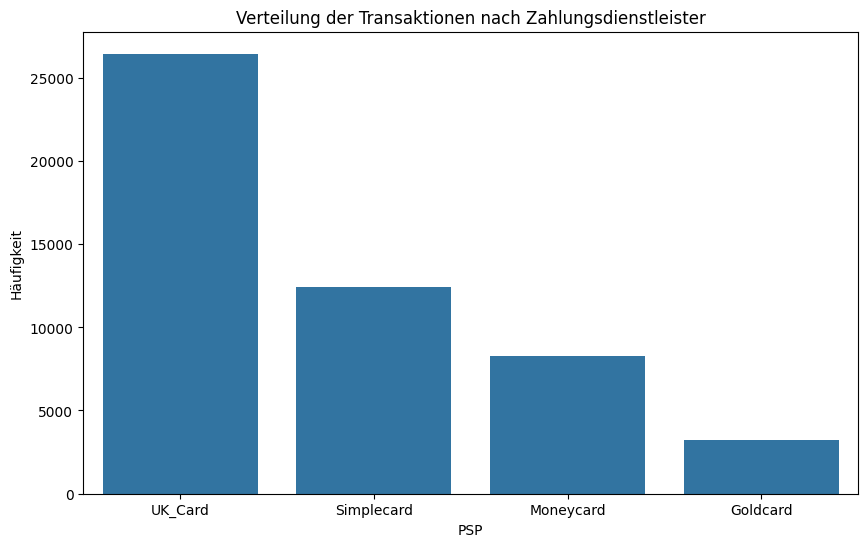

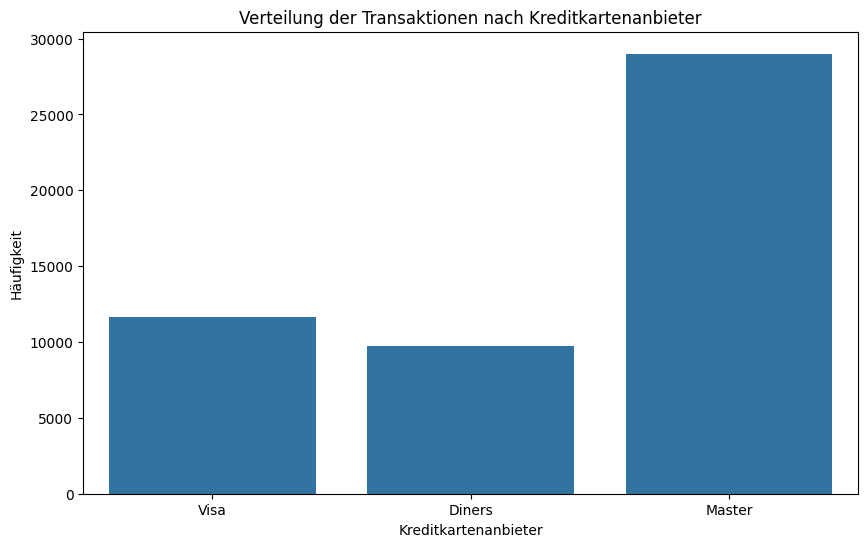

In [5]:
# Verteilung von 3D_secured
plt.figure(figsize=(6, 4))
sns.countplot(x='3D_secured', data=data)
plt.title('Verteilung von 3D gesicherten Transaktionen')
plt.xlabel('3D gesichert')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Land
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Verteilung der Transaktionen nach Land')
plt.xlabel('Land')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Zahlungsdienstleister (PSP)
plt.figure(figsize=(10, 6))
sns.countplot(x='PSP', data=data)
plt.title('Verteilung der Transaktionen nach Zahlungsdienstleister')
plt.xlabel('PSP')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Kreditkartenanbieter
plt.figure(figsize=(10, 6))
sns.countplot(x='card', data=data)
plt.title('Verteilung der Transaktionen nach Kreditkartenanbieter')
plt.xlabel('Kreditkartenanbieter')
plt.ylabel('Häufigkeit')
plt.show()

In [6]:
# Anzahl der ursprünglichen Datensätze
original_count = len(data)

# Konvertieren des Zeitstempels in das datetime-Format
data['tmsp'] = pd.to_datetime(data['tmsp'])

# Sortieren der Daten nach 'country', 'amount' und 'tmsp'
data = data.sort_values(by=['country', 'amount', 'tmsp'])

# Berechnung der Zeitdifferenz zur vorherigen Transaktion in Sekunden
data['time_diff'] = data.groupby(['country', 'amount'])['tmsp'].diff().dt.total_seconds()

# Duplikate innerhalb einer Minute (60 Sekunden) entfernen
data = data[(data['time_diff'].isna()) | (data['time_diff'] > 60)]

# Anzahl der Datensätze nach dem Entfernen der Duplikate
new_count = len(data)

# Anzahl der entfernten Duplikate
removed_count = original_count - new_count

print(f"Ursprüngliche Anzahl der Datensätze: {original_count}")
print(f"Anzahl der Datensätze nach dem Entfernen der Duplikate: {new_count}")
print(f"Anzahl der entfernten Duplikate: {removed_count}")

# Entfernen der 'time_diff'-Spalte, da sie nicht mehr benötigt wird
data = data.drop(columns=['time_diff'])

# Anzeigen der ersten Zeilen nach dem Entfernen von Duplikaten
data.head()

Ursprüngliche Anzahl der Datensätze: 50410
Anzahl der Datensätze nach dem Entfernen der Duplikate: 27337
Anzahl der entfernten Duplikate: 23073


,tmsp,country,amount,success,PSP,3D_secured,card
9238,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners
22742,2019-01-27 14:01:11,Austria,6,1,Simplecard,0,Master
33737,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners
40539,2019-02-16 08:24:40,Austria,6,1,UK_Card,1,Master
21179,2019-01-25 04:18:26,Austria,7,0,Moneycard,0,Master


Fehlende Werte pro Spalte:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


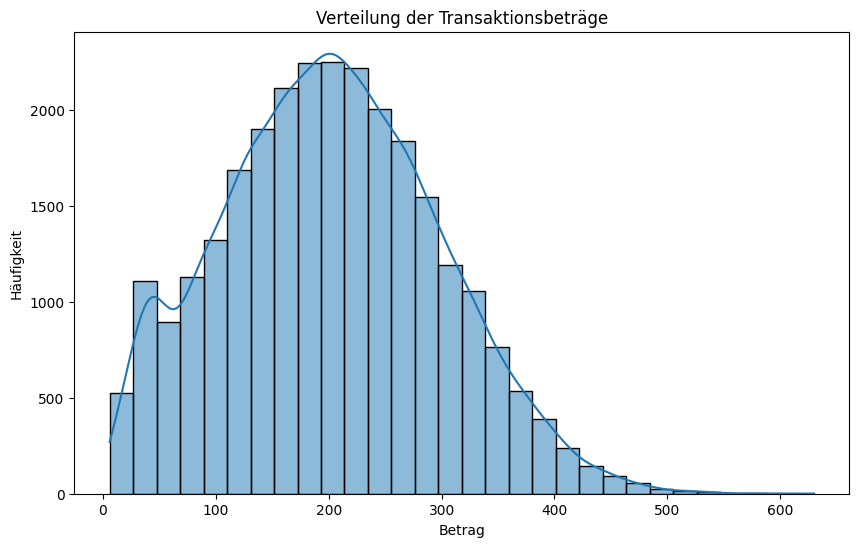

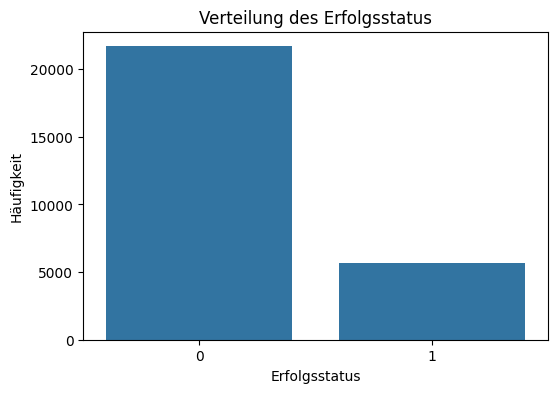

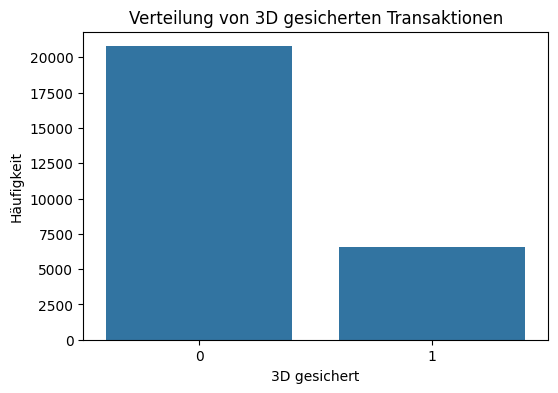

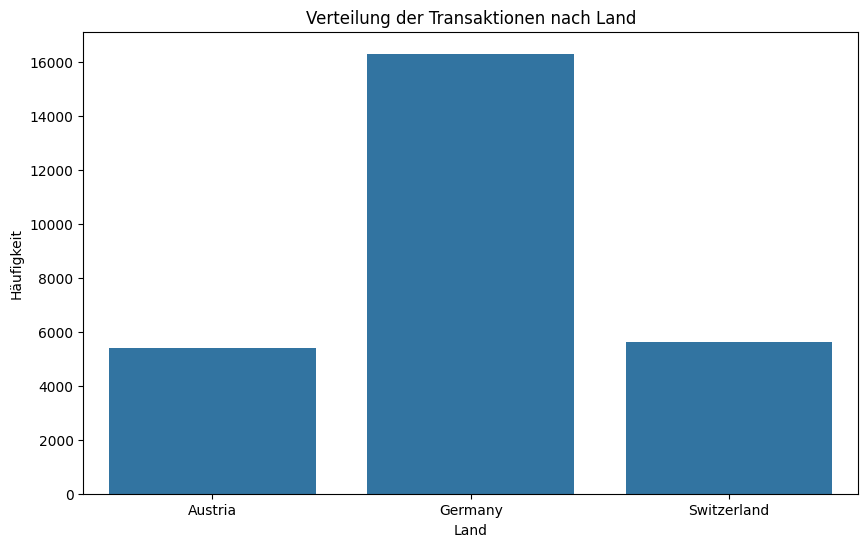

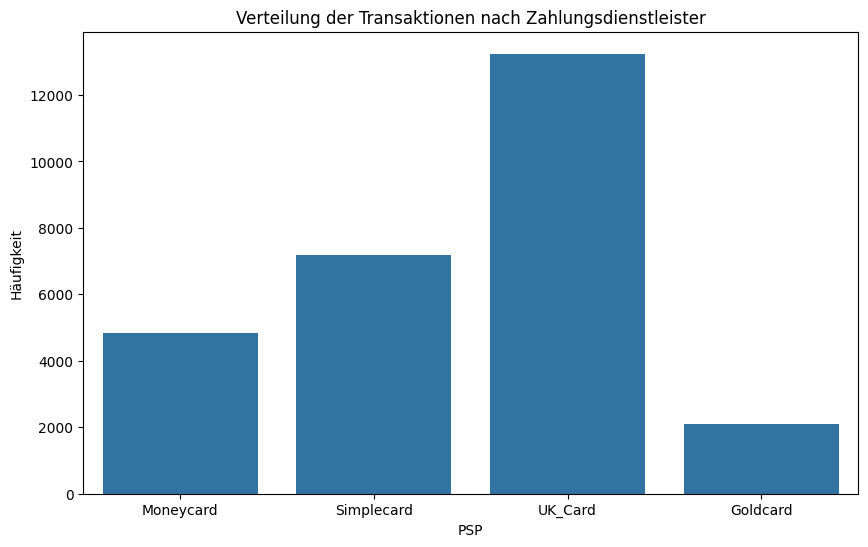

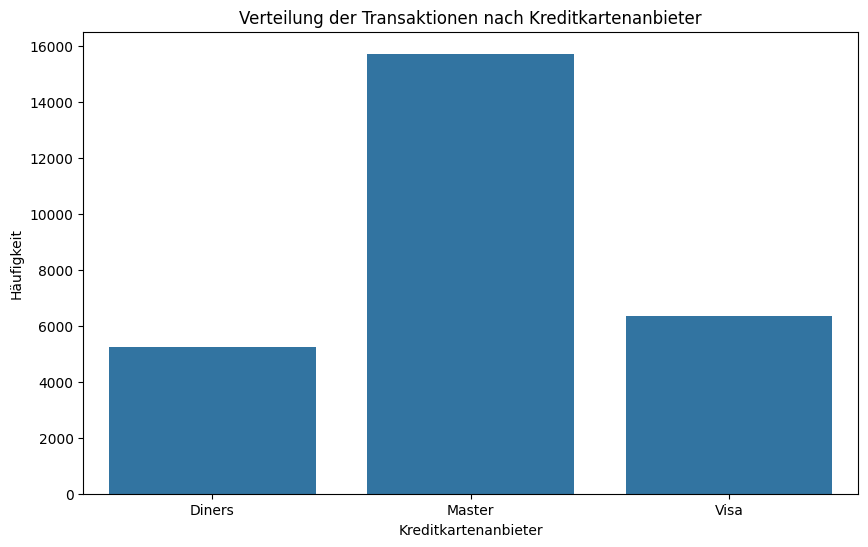

In [7]:
# Überprüfen auf fehlende Werte
missing_values = data.isnull().sum()
print("Fehlende Werte pro Spalte:\n", missing_values)

# Grundlegende Statistiken des Datensatzes
data.describe()

# Verteilung der Transaktionsbeträge
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Verteilung der Transaktionsbeträge')
plt.xlabel('Betrag')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung des Erfolgsstatus
plt.figure(figsize=(6, 4))
sns.countplot(x='success', data=data)
plt.title('Verteilung des Erfolgsstatus')
plt.xlabel('Erfolgsstatus')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung von 3D_secured
plt.figure(figsize=(6, 4))
sns.countplot(x='3D_secured', data=data)
plt.title('Verteilung von 3D gesicherten Transaktionen')
plt.xlabel('3D gesichert')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Land
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Verteilung der Transaktionen nach Land')
plt.xlabel('Land')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Zahlungsdienstleister (PSP)
plt.figure(figsize=(10, 6))
sns.countplot(x='PSP', data=data)
plt.title('Verteilung der Transaktionen nach Zahlungsdienstleister')
plt.xlabel('PSP')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Kreditkartenanbieter
plt.figure(figsize=(10, 6))
sns.countplot(x='card', data=data)
plt.title('Verteilung der Transaktionen nach Kreditkartenanbieter')
plt.xlabel('Kreditkartenanbieter')
plt.ylabel('Häufigkeit')
plt.show()

In [8]:
# Überprüfen der Datentypen
print(data.dtypes)

# Sicherstellen, dass 'amount' numerisch ist
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Sicherstellen, dass 'tmsp' ein Datumstyp ist
data['tmsp'] = pd.to_datetime(data['tmsp'], errors='coerce')

tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


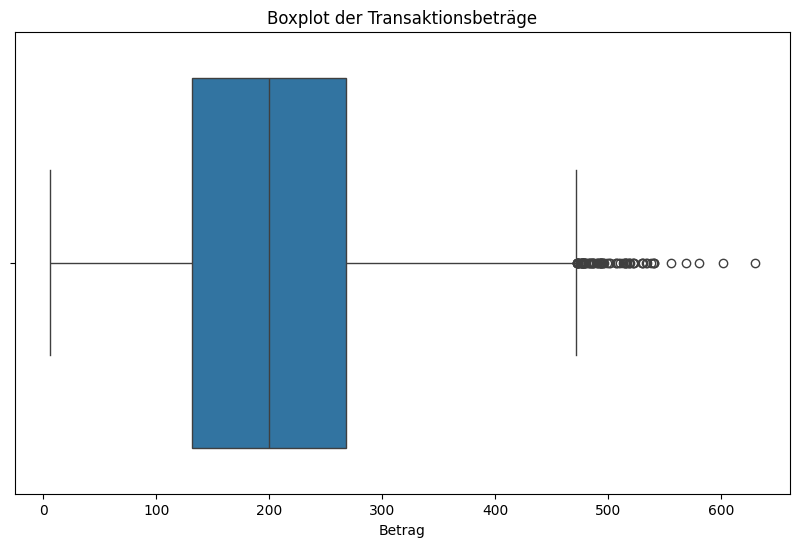

In [9]:
# Boxplot zur Identifikation von Ausreißern bei den Transaktionsbeträgen
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['amount'])
plt.title('Boxplot der Transaktionsbeträge')
plt.xlabel('Betrag')
plt.show()

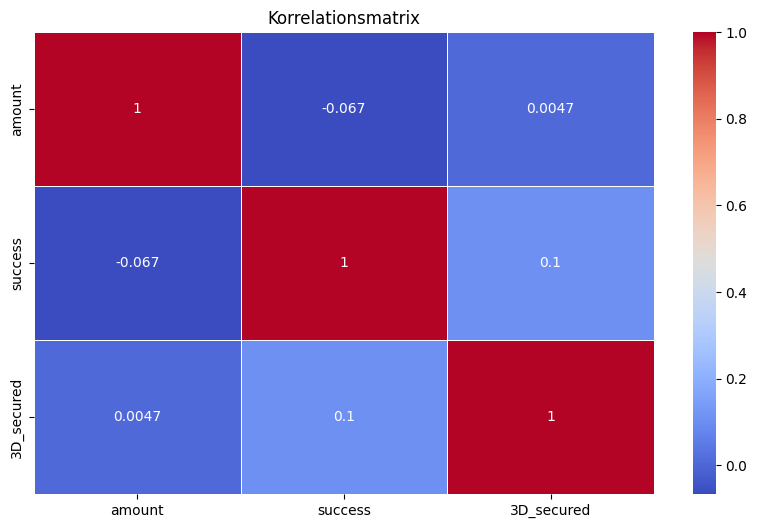

In [10]:
# Auswahl der numerischen Spalten
numeric_columns = data.select_dtypes(include=['number']).columns

# Korrelationen zwischen numerischen Variablen berechnen
correlation_matrix = data[numeric_columns].corr()

# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

In [11]:
# Einzigartige Werte in den kategorischen Spalten anzeigen
print("Einzigartige Werte in 'country':", data['country'].unique())
print("Einzigartige Werte in 'PSP':", data['PSP'].unique())
print("Einzigartige Werte in 'card':", data['card'].unique())

Einzigartige Werte in 'country': ['Austria' 'Germany' 'Switzerland']
Einzigartige Werte in 'PSP': ['Moneycard' 'Simplecard' 'UK_Card' 'Goldcard']
Einzigartige Werte in 'card': ['Diners' 'Master' 'Visa']


In [12]:
# Bereinigte Daten speichern
data.to_excel("/Users/userlow/Documents/kreditkarte_aufgabe/data/bereinigte_daten.xlsx", index=False)

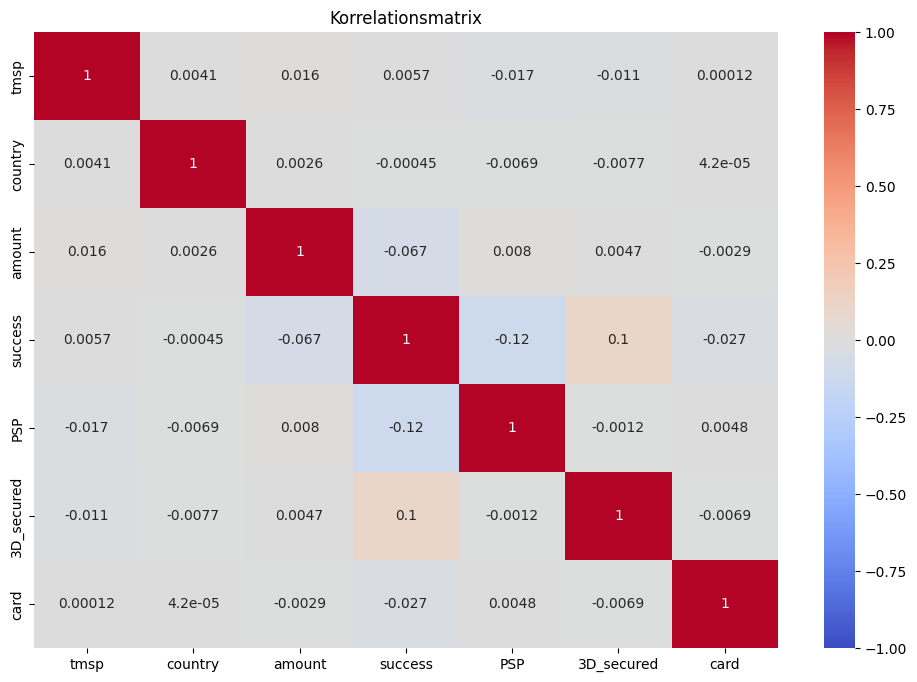

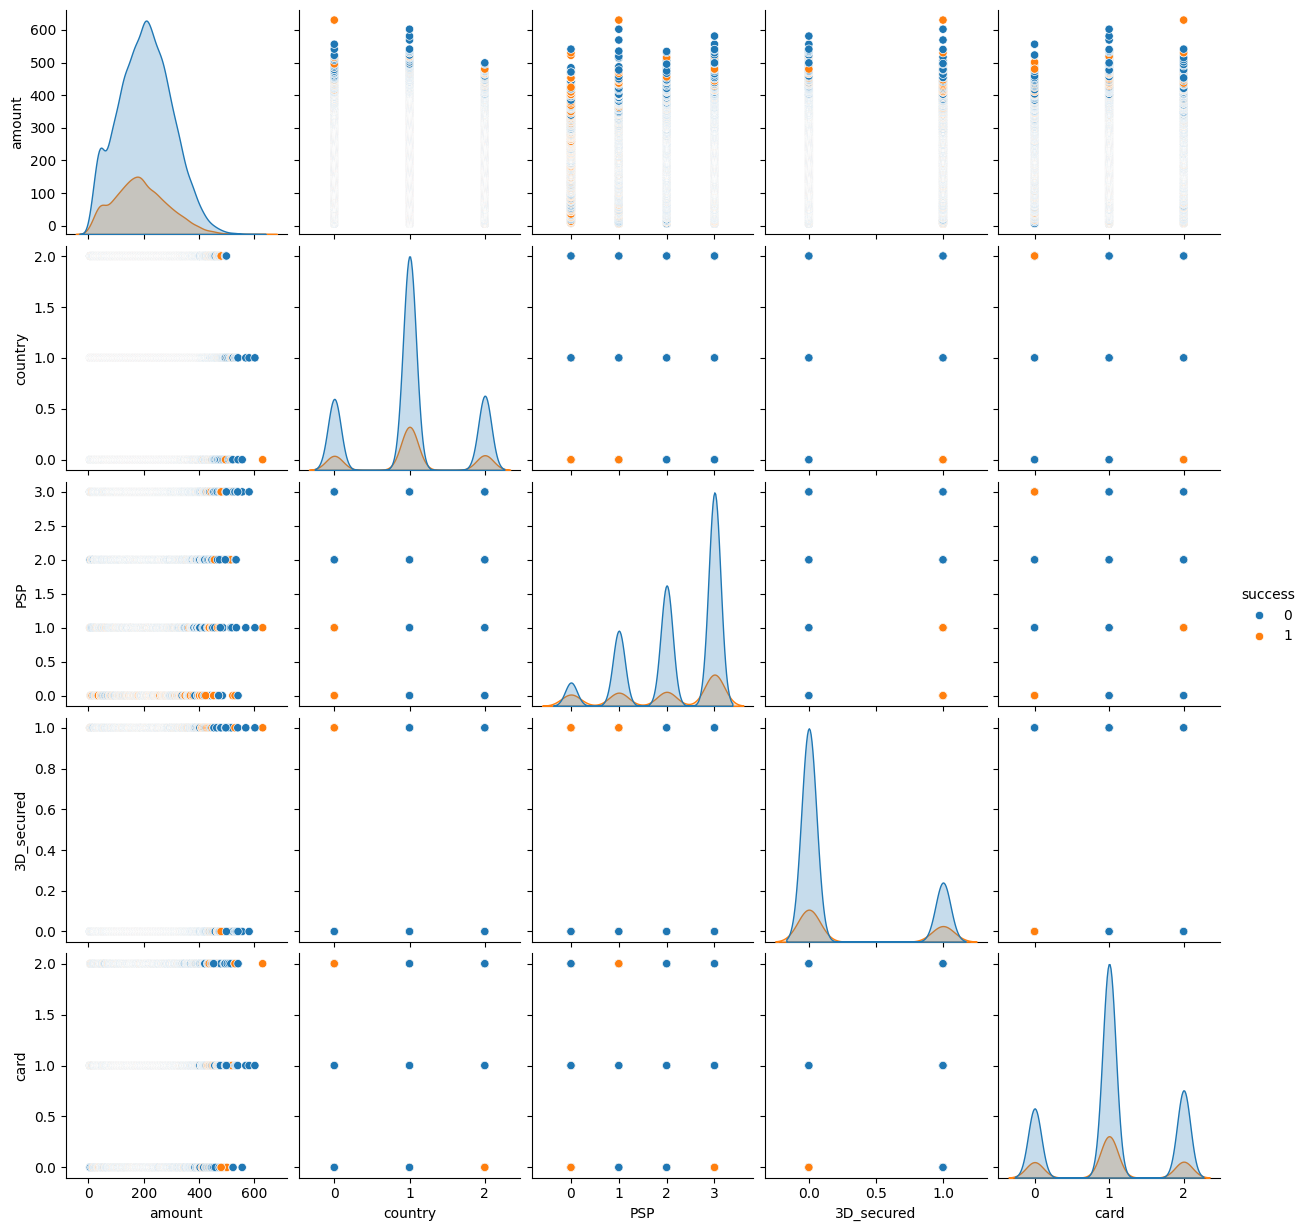

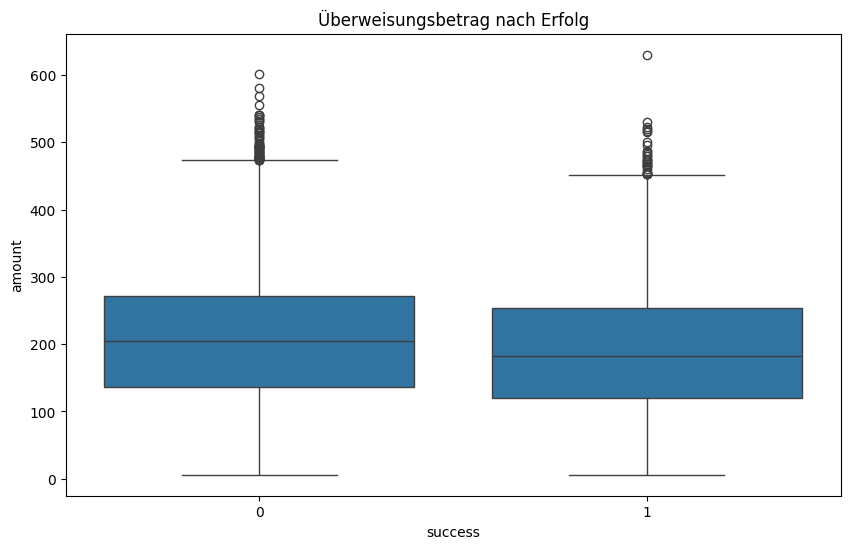

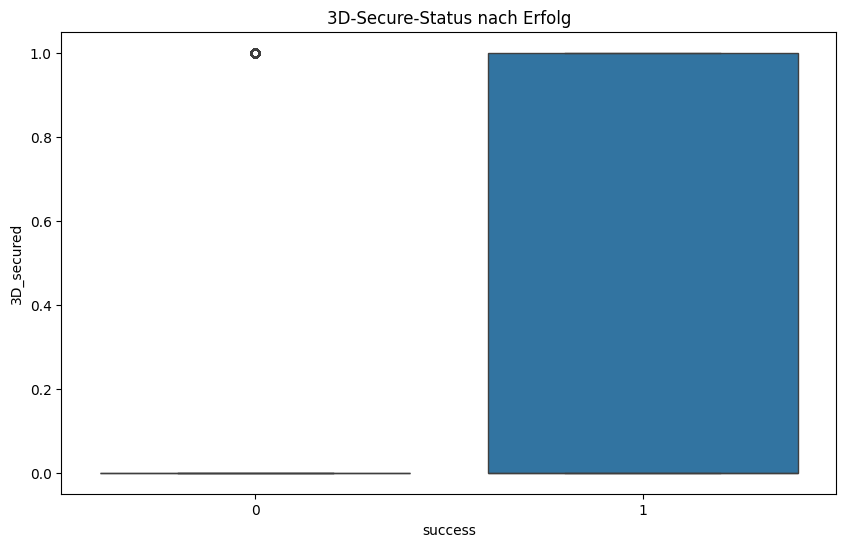

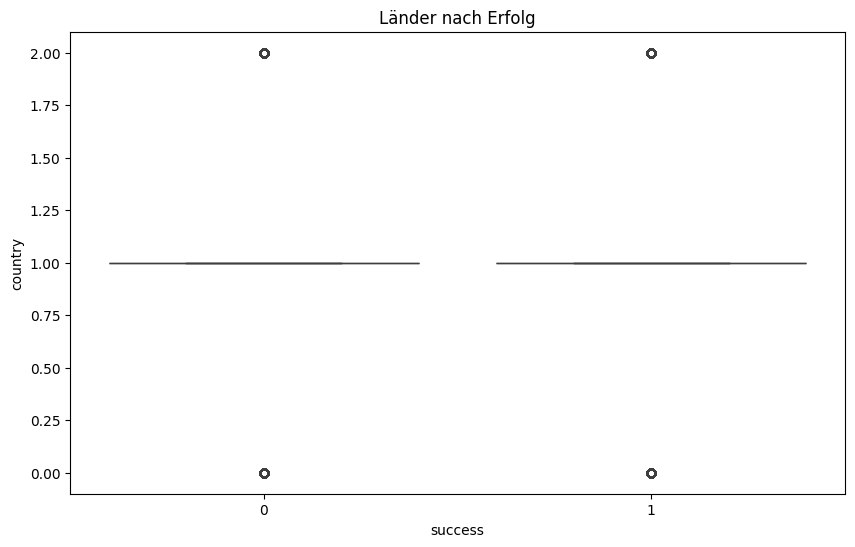

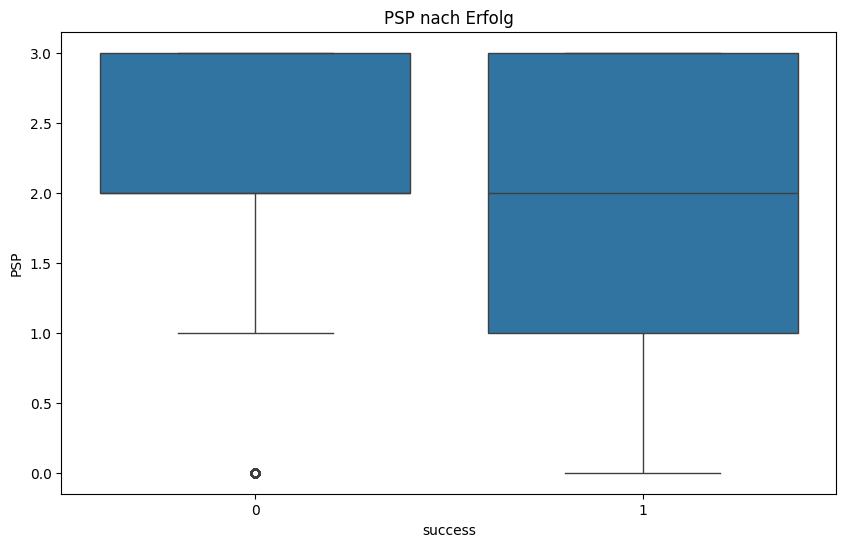

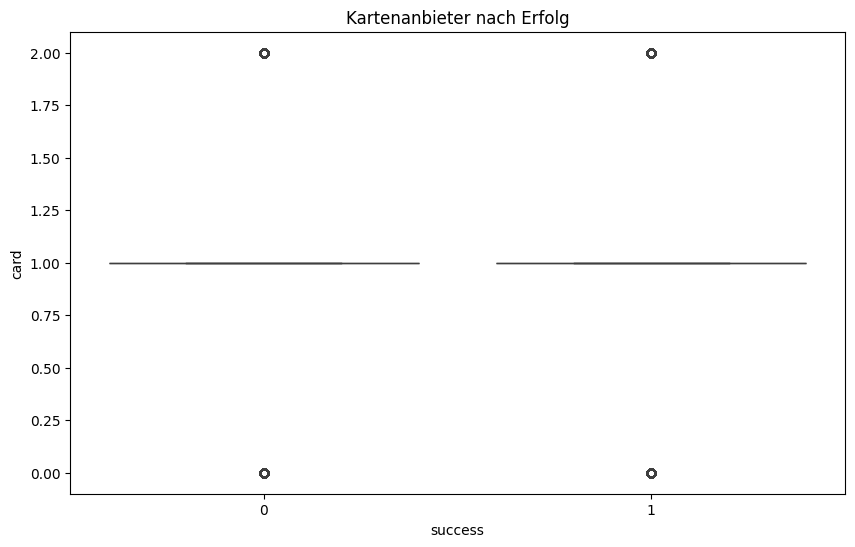

In [13]:


# Umwandeln von kategorischen Merkmalen in numerische
data['country'] = data['country'].astype('category').cat.codes
data['PSP'] = data['PSP'].astype('category').cat.codes
data['card'] = data['card'].astype('category').cat.codes

# Korrelationsmatrix erstellen
corr_matrix = data.corr()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix")
plt.show()

# Paarweise Korrelationsplots
sns.pairplot(data, vars=['amount', 'country', 'PSP', '3D_secured', 'card'], hue='success')
plt.show()

# Boxplot für den Betrag nach Erfolg
plt.figure(figsize=(10, 6))
sns.boxplot(x='success', y='amount', data=data)
plt.title("Überweisungsbetrag nach Erfolg")
plt.show()

# Boxplot für den 3D-Secure-Status nach Erfolg
plt.figure(figsize=(10, 6))
sns.boxplot(x='success', y='3D_secured', data=data)
plt.title("3D-Secure-Status nach Erfolg")
plt.show()

# Boxplot für die Länder nach Erfolg
plt.figure(figsize=(10, 6))
sns.boxplot(x='success', y='country', data=data)
plt.title("Länder nach Erfolg")
plt.show()

# Boxplot für die PSP nach Erfolg
plt.figure(figsize=(10, 6))
sns.boxplot(x='success', y='PSP', data=data)
plt.title("PSP nach Erfolg")
plt.show()

# Boxplot für die Kartenanbieter nach Erfolg
plt.figure(figsize=(10, 6))
sns.boxplot(x='success', y='card', data=data)
plt.title("Kartenanbieter nach Erfolg")
plt.show()